In [1]:
from math import radians, degrees
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# theta er defineret i forhold til nord, dette er altså ikke standard deff af tranformationen.

def to_cartesian(theta , r):
    y=np.cos(radians(theta))*r
    x=np.sin(radians(theta))*r
    return x,y

def to_polar(x,y):
    r = np.sqrt(x*x + y*y)
    theta = degrees(np.arctan2(x, y))
    if theta<0 :
        theta=theta+360
    return theta, r

beholden kurs: 260.5376777919744 beholden fart 6.082762530298219
Sætning: 9.462322208025626
Fartændring: -0.08276253029821934


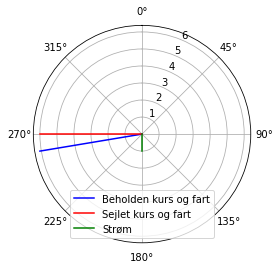

In [3]:
# Til Generel overvejelse om at sejle mod vest, og begrænsninger i mulige kurser

# beregn beholden fart og kurs fra sejlet kurs og fart samt strøm

sejlet_kurs=270
sejlet_fart=6

stroem_retning=180
stroem_fart=1

x1,y1=to_cartesian(sejlet_kurs,sejlet_fart)
x2,y2=to_cartesian(stroem_retning,stroem_fart)
beh_kurs, beh_fart = to_polar(x1+x2,y1+y2)
print('beholden kurs:' , beh_kurs, 'beholden fart', beh_fart)
print('Sætning:', sejlet_kurs - beh_kurs )
print('Fartændring:', sejlet_fart - beh_fart )

plt.clf()
sp = plt.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(-1)
plt.plot([0, radians(beh_kurs)], [0, beh_fart],c='blue',label='Beholden kurs og fart')
plt.plot([0, radians(sejlet_kurs)], [0, sejlet_fart],c='red',label='Sejlet kurs og fart')
plt.plot([0, radians(stroem_retning)], [0, stroem_fart],c='green',label='Strøm')
sp.legend(loc='lower center')
plt.show()


sejlet kurs:  327.8894999791162 , beholden_fart:  5.180319075399031
Sætning: 5.889499979116181
Fartændring: 0.8196809246009691


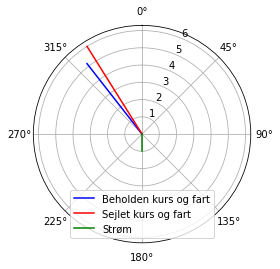

In [4]:
# Til 1. strækning til Sjælland N

# Beregn beholden fart og sejlet kurs fra sejlet fart og beholden kurs 
# Det er et grimt ikke-lineært problem, så det må løses numerisk

sejlet_fart=6
#sejlet_kurs = ??

beh_kurs=322
#beholden_fart= ??

# stroem_retning=180
stroem_fart=1


def eq(p, p1):
    sejlet_kurs, beh_fart = p
    sejlet_fart, beh_kurs, stroem_retning, stroem_fart = p1    
    
    x1,y1=to_cartesian(beh_kurs,beh_fart)
    x2,y2=to_cartesian(stroem_retning,stroem_fart)
    sejlet_kurs_gaet, sejlet_fart_gaet = to_polar(x1-x2,y1-y2)
    return(sejlet_kurs_gaet-sejlet_kurs, sejlet_fart_gaet-sejlet_fart)

sejlet_kurs ,beh_fart =  fsolve(eq, (beh_kurs, sejlet_fart), args=[sejlet_fart, beh_kurs,stroem_retning, stroem_fart])

print('sejlet kurs: ', sejlet_kurs, ', beholden_fart: ',  beh_fart)

print('Sætning:', sejlet_kurs - beh_kurs )
print('Fartændring:', sejlet_fart - beh_fart )

plt.clf()
sp = plt.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(-1)
plt.plot([0, radians(beh_kurs)], [0, beh_fart],c='blue',label='Beholden kurs og fart')
plt.plot([0, radians(sejlet_kurs)], [0, sejlet_fart],c='red',label='Sejlet kurs og fart')
plt.plot([0, radians(stroem_retning)], [0, stroem_fart],c='green',label='Strøm')
sp.legend(loc='lower center')
plt.show()
